### 12.2 Assignment: Term Project

Author: Barbara Jean

Date: 03/04/2023

output: pdf_document

**Statistical question: What factors might impact students' academic performance?**

**Statistic approach**

To address this problem, we will use the tools of statistics, which Include:
- Data collection: we will use data on Kaggle provided by a survey of secondary schools and data collection on student performance.
- Descriptive statistics: We will produce statistics summarizing the data and assess several summarize the data and assess several data visualization techniques.
- Exploratory data analysis: To answer the question we are interested in, we will search for patterns, contrasts, and other characteristics.
- Hypothesis testing: where visible effects are present; In this case, I will use permutation tests based on resampling the original data without replacement. 


In [365]:
# importing modules from thinkstats2
import thinkstats2
import thinkplot

In [366]:
# Importing libraries
import pandas as pd
import numpy as np
import statistics as st
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf


In [367]:
data=pd.read_csv("C:/Users/79bar/ThinkStats2/code/studentdata.csv") # Reading the data

In [368]:
 df = pd.DataFrame(data) # Reading the first five lines in the data into a Pandas DataFrame
df.head()

,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averagegrade
0,F,18,U,GT3,A,4,4,at_home,teacher,course,...,3,4,1,1,3,6,5,6,6,5.67
1,F,17,U,GT3,T,1,1,at_home,other,course,...,3,3,1,1,3,4,5,5,6,5.33
2,F,15,U,LE3,T,1,1,at_home,other,other,...,3,2,2,3,3,10,7,8,10,8.33
3,F,15,U,GT3,T,4,2,health,services,home,...,2,2,1,1,5,2,15,14,15,14.67
4,F,16,U,GT3,T,3,3,other,other,home,...,3,2,1,2,5,4,6,10,10,8.67


**1: A minimum of 5 variables in your dataset used during your analysis (for help with selecting, the author made his selection on page 6 of your book). Consider what you think could have an impact on your question – remember this is never perfect, so don’t be worried if you miss one (Chapter 1) and 2- Describe what the 5 variables mean in the dataset (Chapter 1**

All of the variables in the dataset have already been read, and we now know that there are 33 variables. I will utilize the following variables in this project's explorations:
1. **gender:** is the nominal variable student's sex('F' - female or 'M' - male) 
2. **age:** is the ratio variable representing age of student
3. **Medu:** is the ordinal variable representing mother's education (0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 
     secondary or 4- higher education)
4. **Fedu:** is the ordinal variable reprensenting father's education (0 - none, 1 - primary education (4th grade), 2 - 5th to 9th     
     grade, 3 secondary or 4 - higher education)
5. **traveltime:** is the ordinal variable representing time home to school travel time (1 - < 5 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
6. **Walc:** is the ordinal variable representing the weekend alcohol consumption (from 1 - very low to 5 - very high)
7. **health:** is the ordinal variable representing the current health status (from 1 - very bad to 5 - very good)
8. **averagegrade:** is the floating number representing the sum of all the scores on an assessment divided by the number of grade

### Understanding the data

In [369]:
df.tail() # Reading the last five lines in the data

,gender,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averagegrade
390,M,20,U,LE3,A,2,2,services,services,course,...,5,4,4,5,4,11,9,9,9,9.00
391,M,17,U,LE3,T,3,1,services,services,course,...,4,5,3,4,2,3,14,16,16,15.33
392,M,21,R,GT3,T,1,1,other,other,course,...,5,3,3,3,3,3,10,8,7,8.33
393,M,18,R,LE3,T,3,2,services,other,course,...,4,1,3,4,5,0,11,12,10,11.00
394,M,19,U,LE3,T,1,1,other,at_home,course,...,2,3,3,3,5,5,8,9,9,8.67


In [370]:
df.shape # Looking for how many line and columns in the data

(395, 33)

In [371]:
df.columns # Print the column names.

Index(['gender', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'averagegrade'],
      dtype='object')

In [372]:
# look for missing values
df.isnull().any()

gender          False
age             False
address         False
famsize         False
Pstatus         False
Medu            False
Fedu            False
Mjob            False
Fjob            False
reason          False
guardian        False
traveltime      False
studytime       False
failures        False
schoolsup       False
famsup          False
paid            False
activities      False
nursery         False
higher          False
internet        False
romantic        False
famrel          False
freetime        False
goout           False
Dalc            False
Walc            False
health          False
absences        False
G1              False
G2              False
G3              False
averagegrade    False
dtype: bool

In [373]:
df.dtypes # Displaying types of variables

gender           object
age               int64
address          object
famsize          object
Pstatus          object
Medu              int64
Fedu              int64
Mjob             object
Fjob             object
reason           object
guardian         object
traveltime        int64
studytime         int64
failures          int64
schoolsup        object
famsup           object
paid             object
activities       object
nursery          object
higher           object
internet         object
romantic         object
famrel            int64
freetime          int64
goout             int64
Dalc              int64
Walc              int64
health            int64
absences          int64
G1                int64
G2                int64
G3                int64
averagegrade    float64
dtype: object

In [374]:
df.columns[0] # Select a single column name.

'gender'

In [375]:
age=df['age']
type(age) # Select a column and check what type it is.


pandas.core.series.Series

In [376]:
df.studytime # Print a column.

0      2
1      2
2      2
3      3
4      2
      ..
390    2
391    1
392    1
393    1
394    1
Name: studytime, Length: 395, dtype: int64

In [377]:
df.studytime  [0] # Select a single element from a column.

2

In [378]:
df.studytime  [2:5] # Select a slice from a column

2    2
3    3
4    2
Name: studytime, dtype: int64

In [379]:
df['studytime'].value_counts() # Count the number of times each value appears.

2    198
1    105
3     65
4     27
Name: studytime, dtype: int64

In [380]:
df.describe() # Getting the general feel of the dataset

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,averagegrade
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190,10.679139
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443,3.696912
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,1.330000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000,8.330000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000,10.670000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000,13.330000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000,19.330000


In [381]:
df.nunique() # nunique() method returning the number of unique values for each column.


gender           2
age              8
address          2
famsize          2
Pstatus          2
Medu             5
Fedu             5
Mjob             5
Fjob             5
reason           4
guardian         3
traveltime       4
studytime        4
failures         4
schoolsup        2
famsup           2
paid             2
activities       2
nursery          2
higher           2
internet         2
romantic         2
famrel           5
freetime         5
goout            5
Dalc             5
Walc             5
health           5
absences        34
G1              17
G2              17
G3              18
averagegrade    54
dtype: int64

### Cleaning data

In [382]:
# Removing unecessary variables
student_df=df.drop(['address','famsize','Pstatus','Mjob','Fjob','reason','guardian','failures','schoolsup','famsup','paid',
    'activities','nursery','higher','romantic','famrel','goout','absences','internet','Dalc','freetime','studytime','G1','G2','G3'], axis=1)



In [383]:
# Converting the nominal variable gender to categorical type.(0 for female 1 for male)
student_df['gender']=student_df['gender'].astype('category')
student_df['gender']=student_df['gender'].cat.codes
student_df.head()

,gender,age,Medu,Fedu,traveltime,Walc,health,averagegrade
0,0,18,4,4,2,1,3,5.67
1,0,17,1,1,1,1,3,5.33
2,0,15,1,1,1,3,3,8.33
3,0,15,4,2,1,1,5,14.67
4,0,16,3,3,1,2,5,8.67


In [384]:
student_df.isnull().sum() # Checking null value in the data

gender          0
age             0
Medu            0
Fedu            0
traveltime      0
Walc            0
health          0
averagegrade    0
dtype: int64

In [385]:
student_df.shape # Looking for how many line and columns in the data

(395, 8)

### Starting display data

**3- Include a histogram of each of the 5 variables – in your summary and analysis, identify any outliers and explain the reasoning for them being outliers and how you believe they should be handled (Chapter 2)**.

array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'Medu'}>],
       [<AxesSubplot:title={'center':'Fedu'}>,
        <AxesSubplot:title={'center':'traveltime'}>,
        <AxesSubplot:title={'center':'Walc'}>],
       [<AxesSubplot:title={'center':'health'}>,
        <AxesSubplot:title={'center':'averagegrade'}>, <AxesSubplot:>]],
      dtype=object)

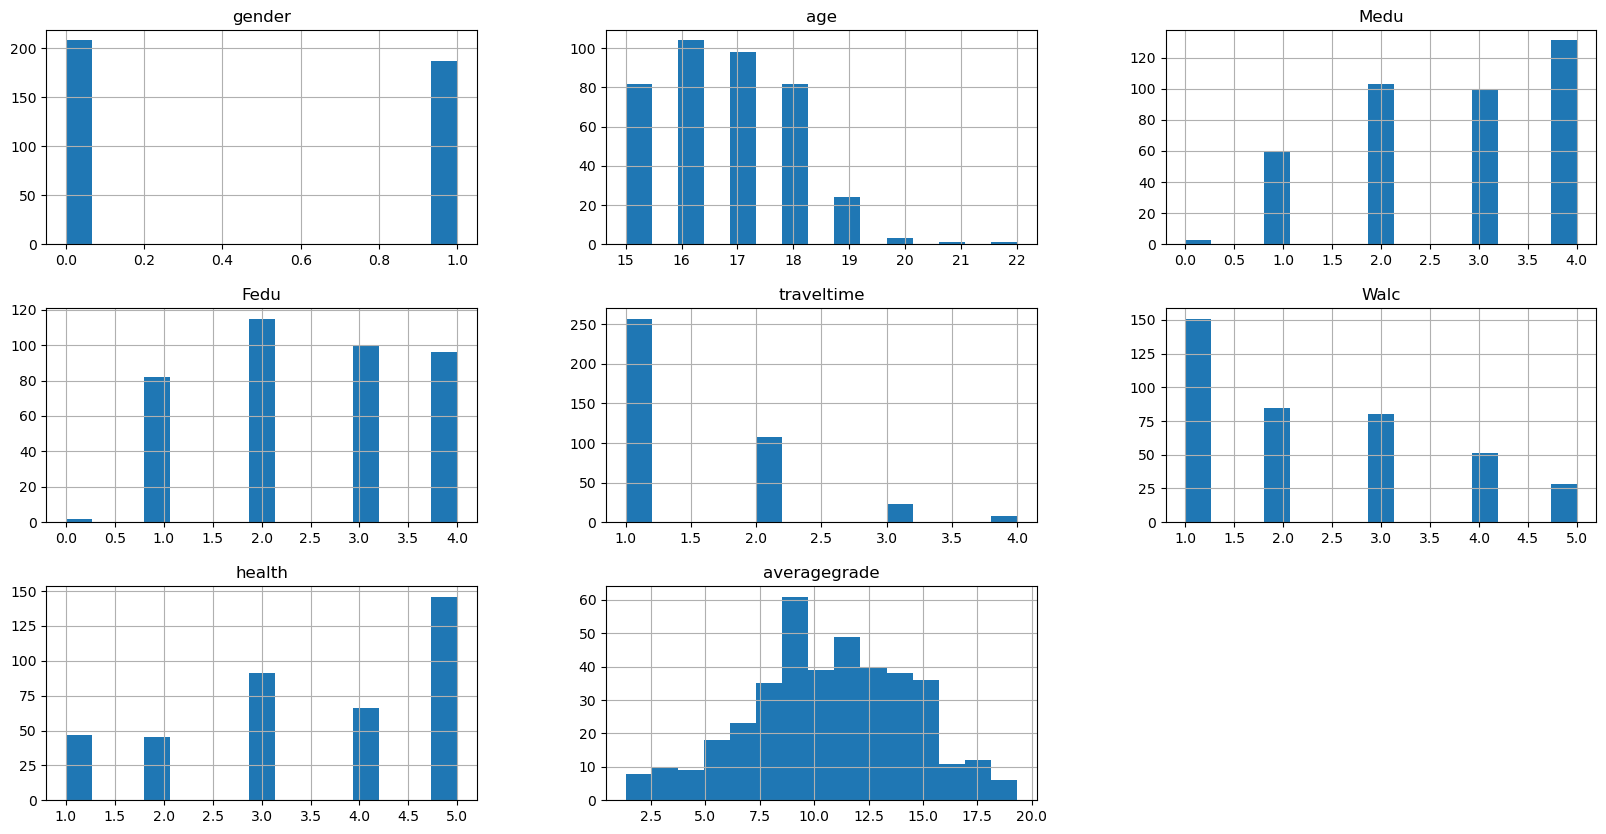

In [386]:
# Hist plots the values and their frequencies as a bar graph
student_df.hist(bins=15,figsize=(20,10))

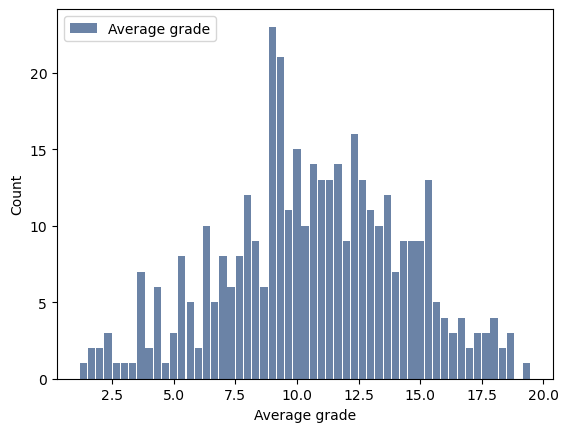

In [387]:
# thinkplot is a wrapper for matplotlib that provides functions that work with the objects in thinkstats2
hist = thinkstats2.Hist(student_df.averagegrade, label="Average grade")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Average grade", ylabel="Count") # Config takes parameters that label the x and y axes

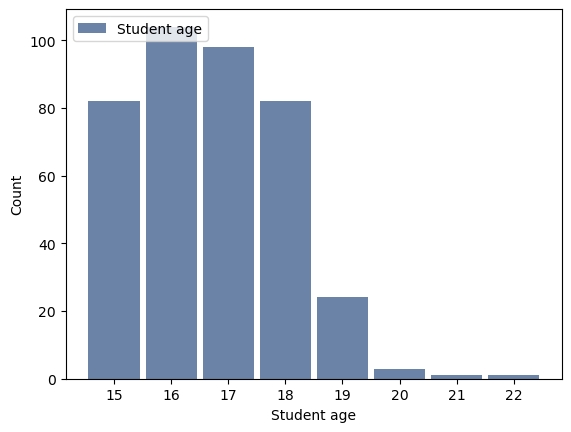

In [388]:
hist = thinkstats2.Hist(student_df.age, label="Student age")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Student age", ylabel="Count")

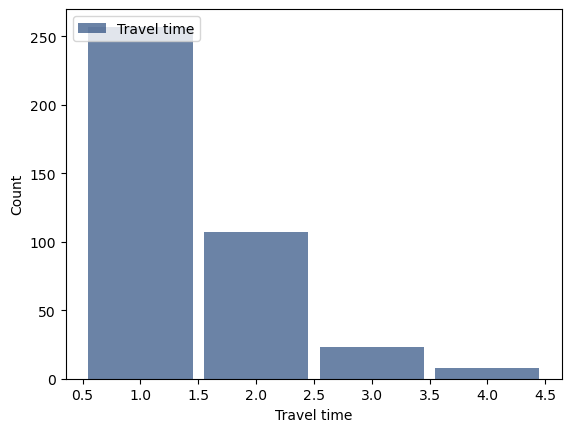

In [389]:
hist = thinkstats2.Hist(student_df.traveltime, label="Travel time")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Travel time", ylabel="Count")


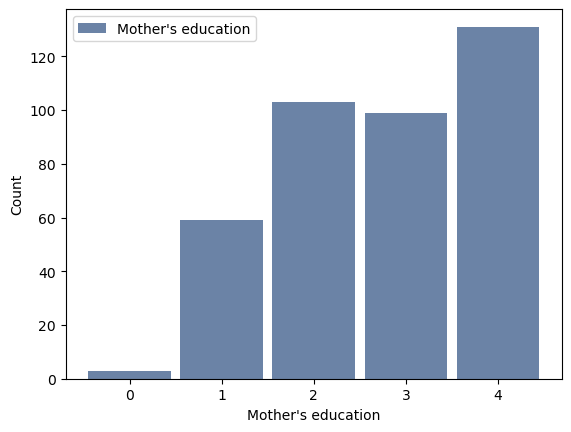

In [390]:
hist = thinkstats2.Hist(student_df.Medu, label="Mother's education")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Mother's education", ylabel="Count")

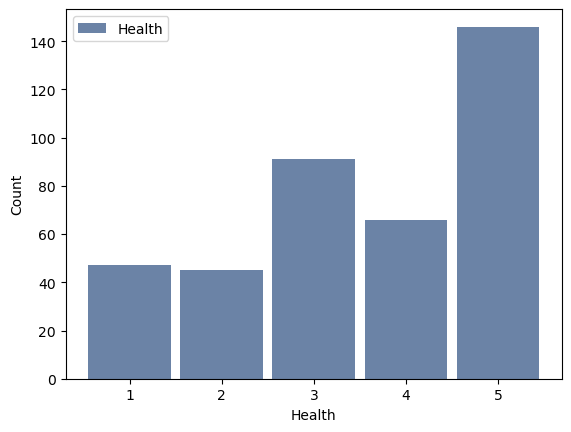

In [391]:
hist = thinkstats2.Hist(student_df.health, label="Health")
thinkplot.Hist(hist)
thinkplot.Config(xlabel="Health", ylabel="Count")

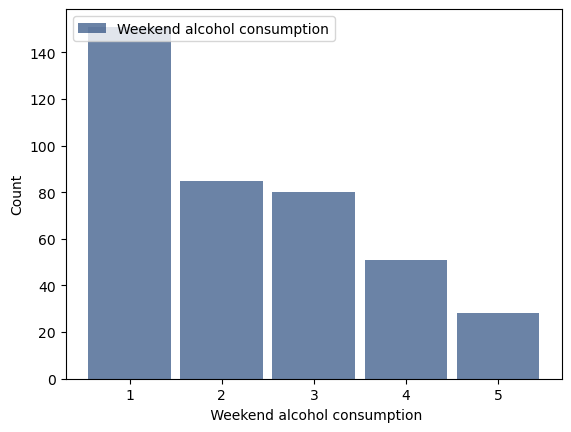

In [392]:
hist = thinkstats2.Hist(student_df.Walc, label="Weekend alcohol consumption")
thinkplot.Hist(hist)
thinkplot.Config(xlabel=" Weekend alcohol consumption", ylabel="Count") # Config takes parameters that label the x and y axes

<AxesSubplot:>

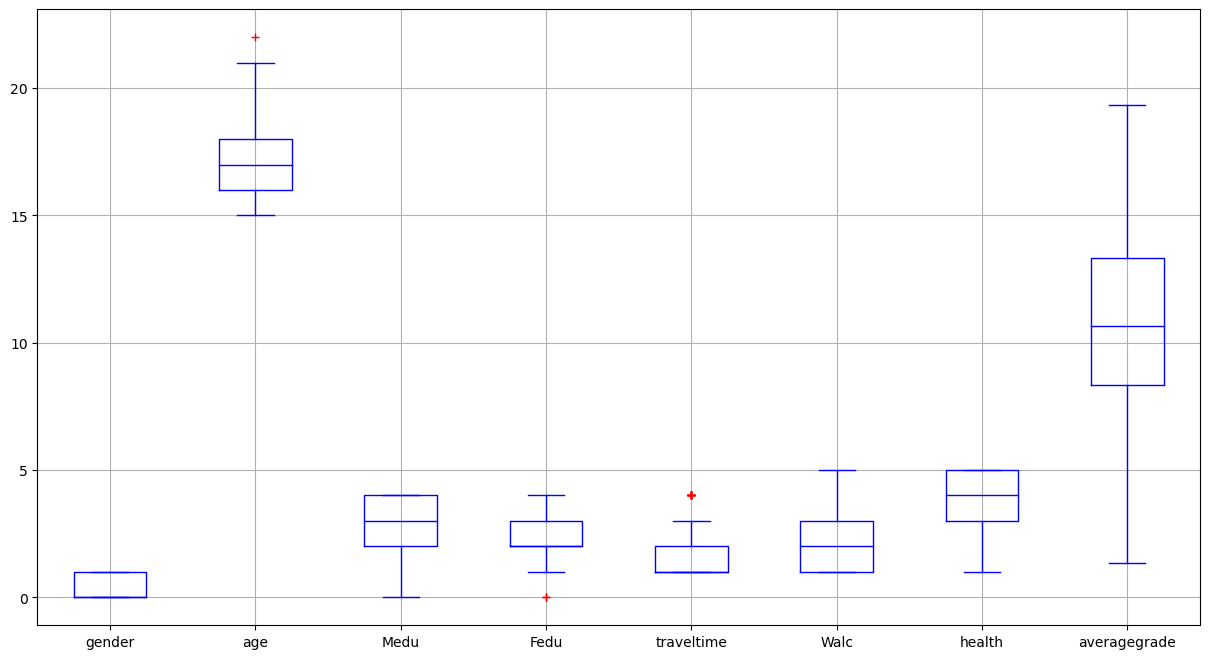

In [393]:
# Checking outliers
plt.figure(figsize=(15,8))
student_df.boxplot(color='b',sym='r+')

**Outliers:**
Data that considerably deviates from other observations is referred to be an outlier. An outlier may be the result of measurement variability, or it may be an indication of an experimental error. These latter are occasionally left out of the dataset because an outlier might seriously impair statistical analysis; therefore, we must search for them. No outliers are seen in this instance.

The most effective method for handling outliers in our data typically relies on human knowledge and experience. It is possible to handle outliers in data in various ways, including removing the values, applying multiple analysis techniques, and assigning a value to the outliers.


**4- Include the other descriptive characteristics about the variables: Mean, Mode, Spread, and Tails (Chapter 2).**

In [394]:
student_df.mean() # Computing the mean to describe the central tendency of the distribution.

gender           0.473418
age             16.696203
Medu             2.749367
Fedu             2.521519
traveltime       1.448101
Walc             2.291139
health           3.554430
averagegrade    10.679139
dtype: float64

In [395]:
student_df.var() # Computing the variance to describe the variability or spread of the distribution.

gender           0.249926
age              1.628285
Medu             1.198445
Fedu             1.184180
traveltime       0.486513
Walc             1.658678
health           1.932944
averagegrade    13.667156
dtype: float64

In [396]:
student_df.std() # Computing the standard deviation to measure how dispersed the data is about the mean.

gender          0.499926
age             1.276043
Medu            1.094735
Fedu            1.088201
traveltime      0.697505
Walc            1.287897
health          1.390303
averagegrade    3.696912
dtype: float64

In [397]:
student_df.mode() # Coumputing the mode to see the most frequent value

,gender,age,Medu,Fedu,traveltime,Walc,health,averagegrade
0,0,16,4,2,1,1,5,9.0


In [398]:
student_df.skew() # Computing the skewed to see the distrubition of data

gender          0.106886
age             0.466270
Medu           -0.318381
Fedu           -0.031672
traveltime      1.607029
Walc            0.611960
health         -0.494604
averagegrade   -0.140516
dtype: float64

Let analyze two of variables according to the result of the descriptive statistic....

**4- Using pg. 29 of your text as an example, compare two scenarios in your data using a PMF. Reminder, this isn’t comparing two variables against each other – it is the same variable, but a different scenario. Almost like a filter. The example in the book is first babies compared to all other babies, it is still the same variable, but breaking the data out based on criteria we are exploring (Chapter 3).** 

In [399]:
female= student_df.loc[student_df['gender'] == 0] # Select rows where the gender is 0 (female)
male = student_df.loc[student_df['gender'] == 1] # # Select rows where the gender is 1 (male)

In [400]:
female_pmf = thinkstats2.Pmf(female.averagegrade, label="female") # Computing Pmf average grade for female student
male_pmf = thinkstats2.Pmf(male.averagegrade, label="male") # Computing Pmf average grade for male student

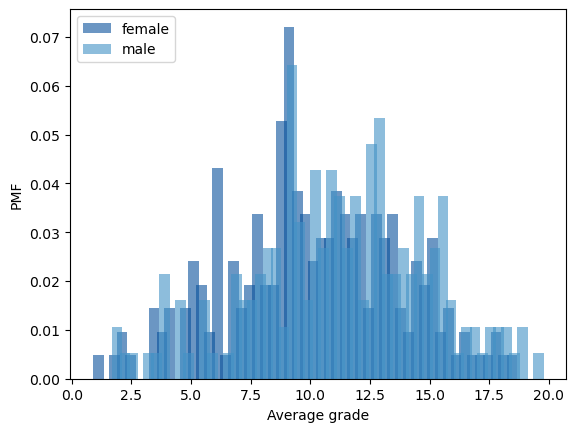

In [401]:
width = 0.45
thinkplot.PrePlot(2) # Taking parameters rows and cols to make grid of figures.
thinkplot.Hist(female_pmf, align="right", width=width)
thinkplot.Hist(male_pmf, align="left", width=width)
thinkplot.Config(xlabel="Average grade", ylabel="PMF")

#thinkplot.PrePlot(2) # Reseting the color generator
#thinkplot.Pmfs([female_pmf, male_pmf])


**5-Create 1 CDF with one of your variables, using page 41-44 as your guide, what does this tell you about your variable and how does it address the question you are trying to answer (Chapter 4).**

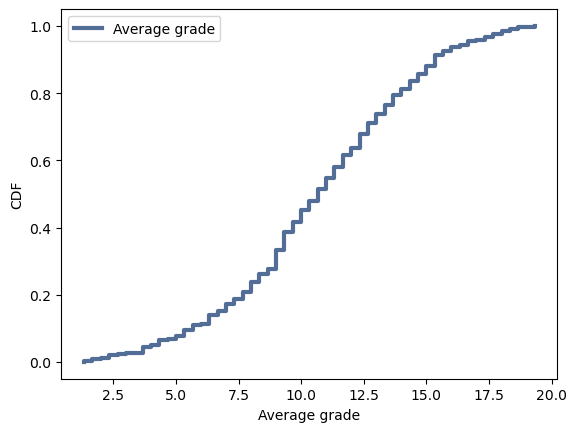

In [402]:
cdf = thinkstats2.Cdf(student_df.averagegrade, label="Average grade")
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel="Average grade", ylabel='CDF', loc='upper left')

The distribution's form can be seen visually in the CDF. The CDF's steep or vertical parts represent typical values.The student grade performance follows a normal distribution with a mean 10.41 and a standard deviation of 4.58. Consequently, we must use a normal CDF with these parameters to answer our question. Cdf provides Prob, which evaluates the CDF and computes the fraction of values less than or equal to the given value. In this case, 89% of student grades are less than or equal to 15.



In [403]:
cdf.Prob(15)

0.8810126582278481

**6- Plot 1 analytical distribution and provide your analysis on how it applies to the dataset you have chosen (Chapter 5).**

For the analytical distribution, we will perform the normal probability plot of student average grade

In [404]:
gradestudent= student_df.averagegrade.dropna()

In [405]:
# The following function generates a normal probability plot.
def MakeNormalPlot(gradestudent):
    """Generates a normal probability plot of student averagegrade .

    gradestudent: sequence
    """
    mean, var = thinkstats2.TrimmedMeanVar(gradestudent, p=0.01)
    std = np.sqrt(var)

    xs = [-5, 5]
    xs, ys = thinkstats2.FitLine(xs, mean, std)
    thinkplot.Plot(xs, ys, color="0.8", label="model")

    xs, ys = thinkstats2.NormalProbability(gradestudent)
    thinkplot.Plot(xs, ys, label="Grade student")

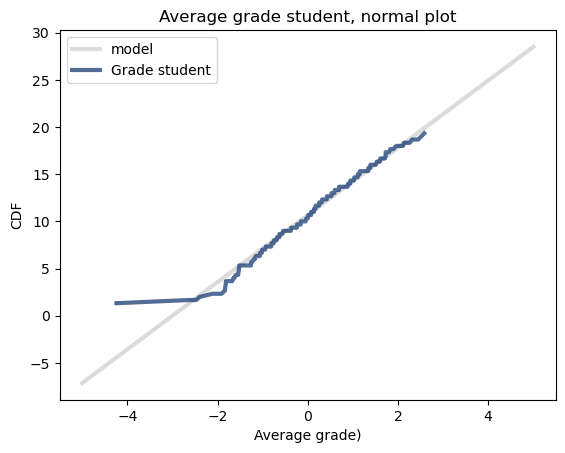

In [406]:
MakeNormalPlot(gradestudent)
thinkplot.Config(
    title="Average grade student, normal plot",
    xlabel="Average grade)",
    ylabel="CDF",
    loc="upper left",
)

Here's the distribution of average grade and a model. A normal probability plot makes it easier to see individual dataset that don’t quite fit a normal distribution.The model fit the data well except in the upper right and the tail with a small deviation.

**7- Create two scatter plots comparing two variables and provide your analysis on correlation and causation. Remember, covariance, Pearson’s correlation, and Non-Linear Relationships should also be considered during your analysis (Chapter 7).**

Create two scatter plots

In [407]:
# Jittering the data for minimizing the effect on the scatter plot.
def Jitter(values, jitter=0.5):
    n = len(values)
    return np.random.normal(0, jitter, n) + values

In [408]:
student_df.averagegrade= Jitter(student_df.averagegrade, 1.3)
student_df.Walc= Jitter(student_df.Walc, 0.5) # Calling Jitter functions

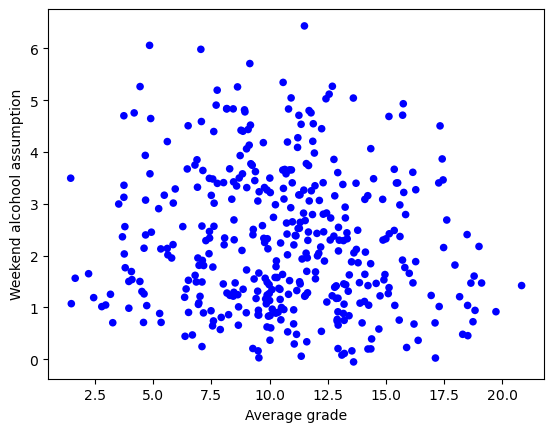

In [409]:
# Seing the relationship between two variables.
thinkplot.Scatter(student_df.averagegrade, student_df.Walc, alpha=1.0) # thinkplot provides Scatter which makes scatter plots
thinkplot.Config(xlabel='Average grade',
                 ylabel='Weekend alcohool assumption')
        

In [410]:
student_df.averagegrade= Jitter(student_df.averagegrade, 1.3) # Calling Jitter functions
student_df.Medu = Jitter(student_df.Medu, 0.5) # Calling Jitter functions

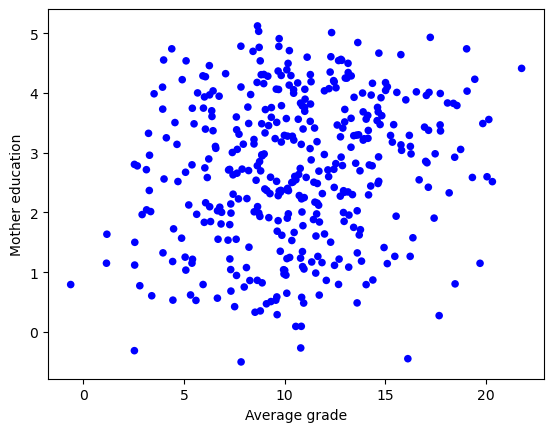

In [411]:
thinkplot.Scatter(student_df.averagegrade, student_df.Medu, alpha=1) # Seing the relationship between two variables.
thinkplot.Config(xlabel='Average grade',
                 ylabel='Mother education')
       
            



Text(0.5, 1.0, 'Correlation Heatmap')

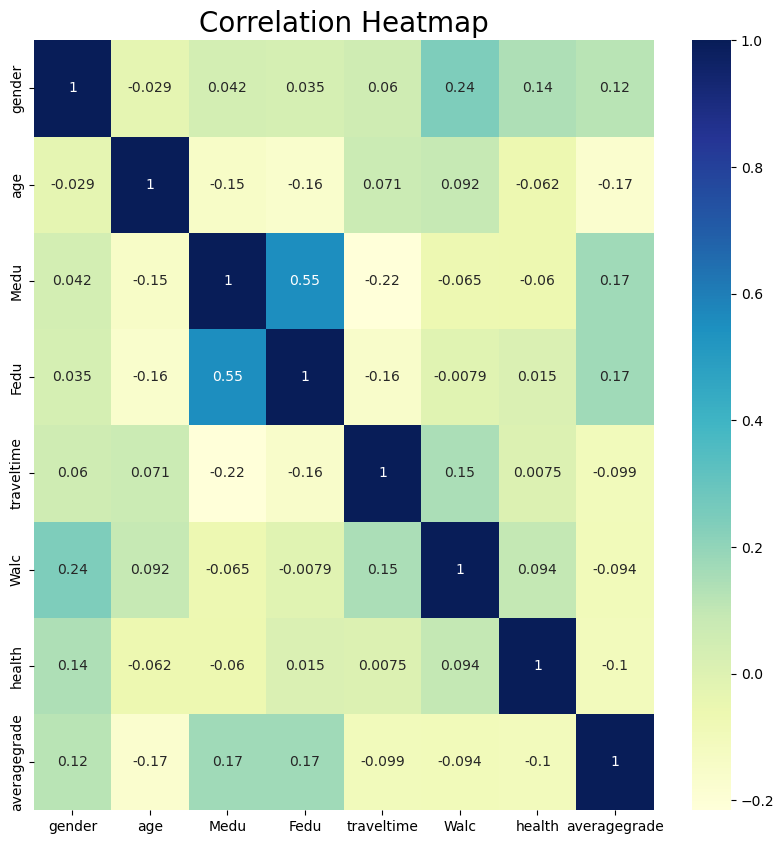

In [412]:
# see correlation between variables through a correlation heatmap
corr = student_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title('Correlation Heatmap', fontsize=20)

In [413]:
# Computing Correlation for average grade and Weekend alcohol consumption
np.corrcoef(student_df.averagegrade, student_df.Walc)

array([[ 1.        , -0.09385907],
       [-0.09385907,  1.        ]])

In [414]:
# Computing Correlation for average grade and mother education
np.corrcoef(student_df.averagegrade, student_df.Medu)

array([[1.       , 0.1727626],
       [0.1727626, 1.       ]])

According to the correlation between those variables, there is a significant correlation between the mother's education and the student's average grade: the positive correlation value, 0,16, shows both variables increase in the same direction. The negative correlation value,-0.015, between average grade and weekend alcohol consumption shows that variables move opposite one another so that when one variable rises, the other falls.

In [415]:
# Computing covariance for average grade and Mother education
np.cov(student_df.averagegrade, student_df.Medu)

array([[16.16755599,  0.86195617],
       [ 0.86195617,  1.53966596]])

In [416]:
# Computing covariance for average grade and Weekend alcohol consumption
np.cov(student_df.averagegrade, student_df.Walc)

array([[16.16755599, -0.51186939],
       [-0.51186939,  1.83959166]])

The covariance value between average grade and mother's education gives you a positive number which means both are positively related. Contrario to average grade and weekend alcohol, the value is a negative number, which means they are negatively related. And the high covariance indicates there is a strong relationship between the variables. A low value means there is a weak relationship.

In [417]:
# Computing Pearsons correlation for average grade and mother education
import pandas as pd
from scipy.stats import pearsonr
corr, _ = pearsonr(student_df.averagegrade, student_df.Medu)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.173


In [418]:
# Computing Pearsons correlation for average grade and Weekend alcohol consumption
corr, _ = pearsonr(student_df.averagegrade, student_df.Walc)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.094


Pearson's correlation is unreliable when there are outliers because it usually understates the magnitude of non-linear interactions. Spearman's correlation is more dependable because non-linear relationships can still be used as long as they are monotonic.

In [419]:
# Declaring SpearmanCorr function 
def SpearmanCorr(xs, ys):
    xs = pd.Series(xs)
    ys = pd.Series(ys)
    return xs.corr(ys, method='spearman')

In [420]:
# Computing Spearman's correlation for average grade and mother education
SpearmanCorr(student_df.averagegrade, student_df.Medu)

0.1613405143123064

In [421]:
# Computing Spearman's correlation for average grade and weenkend alcohool consumption
SpearmanCorr(student_df.averagegrade, student_df.Walc)

-0.0937442925041717

As we can see, the correlation coefficients indicate a positive association between the mother's education and the student's average grade. The Pearson correlation coefficients, which gauge the variables' linear relationship, result in slightly different values for both. While the variables may move in the same or opposite direction, like for average grade and Weekend alcohol consumption, but not necessarily at a constant rate, Spearman correlation coefficients only quantify monotonic correlations. In a linear relationship, however, the rate is steady.

**8- Conduct a test on your hypothesis using one of the methods covered in Chapter 9.**

Using the module from thinkstats2 CorrelationPermute to conduct the test hypothesis.

In [422]:
class CorrelationPermute(thinkstats2.HypothesisTest):
    """Tests correlations by permutation."""

    def TestStatistic(self, data):
        """Computes the test statistic.

        data: tuple of xs and ys
        """
        xs, ys = data
        test_stat = abs(thinkstats2.Corr(xs, ys))
        return test_stat

    def RunModel(self):
        """Run the model of the null hypothesis.

        returns: simulated data
        """
        xs, ys = self.data
        xs = np.random.permutation(xs)
        return xs, ys

In [425]:
cleaned = student_df.dropna(subset=['averagegrade', 'Medu'])
data = cleaned.averagegrade.values, cleaned.Medu.values
ht = CorrelationPermute(data)
pvalue = ht.PValue()
pvalue

0.0

The p-value only indicates the likelihood that the observed data would have occurred under the null hypothesis. The null hypothesis should be rejected since a p-value of less than 0.05 is usually considered statistically significant. In this case, we can compare the actual correlation to the most effective value we saw in the simulations to understand how incredible the observed value is under the null hypothesis.

In [426]:
ht.actual, ht.MaxTestStat()

(0.1727626044726129, 0.16191964892701521)

**9-For this project, conduct a regression analysis on either one dependent and one explanatory variable, or multiple explanatory variables (Chapter 10 & 11).**

In [427]:
# conducting a simple regression analysis whith one dependent and one explanatory variable.
formula = 'averagegrade ~ health'
model = smf.ols(formula, data=student_df) # 'smf.ols' taking the formula string and the dataframe
results = model.fit() # 'fit' method fits the model to the data and returning RegressionResult object that contains the results
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           averagegrade   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.184
Date:                Sat, 04 Mar 2023   Prob (F-statistic):             0.0415
Time:                        21:53:29   Log-Likelihood:                -1107.5
No. Observations:                 395   AIC:                             2219.
Df Residuals:                     393   BIC:                             2227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.6280      0.554     20.998      0.000      10.539      12.717
health        -0.2968      0.145     -2.046      0.041      -0.582      -0.012
==============================================================================
Omnibus:                        1.202   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.548   Jarque-Bera (JB):                1.301
Skew:                           0.108   Prob(JB):                        0.522
Kurtosis:                       2.821   Cond. No.                         11.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [428]:
# Getting the intercept and slope
inter = results.params['Intercept'] 
slope = results.params['health']
inter, slope

(11.62800174657793, -0.29684400151738144)

In [429]:
slope_pvalue = results.pvalues['health'] #  the p-Value associated with traveltime is 0.25 wi
slope_pvalue

0.04146522746946159

In [430]:
results.rsquared # computing the coefficient of determination

0.010534922504368827

The p-value of 0.11 means we are 89% sure of the results. In other words, there is an 11% chance that the results are due to random chance.The effect is significant, given the modest variance between a student's academic achievement and health status.

### Summarize hypothetical question
        
The data used in this project is a dataset available on Kaggle. The dataset is about student performance.The data is already preprocessed to prepare it for this project's primary goal, namely, to visualize the data. As we can see, the data has columns as follows: gender, age, Medu, Fedu, traveltime, Walc, health, and averagegrade.  We display some statistical summaries of the numerical columns and the data output. describe() method. Before using the data, we need to clean it by dropping the unnecessary information drop (), checking missing values, and identifying outliers in the data. In my case, we have all the data.

Next step, we can start analyzing the data by drawing histograms for variables (using thinkplot from the author’s book), checking outliers ( according to the boxplot, we know that student_df does not contain any outliers), including other descriptive characteristics about the variables such as mean, mode, spread, and tails. Testing for correlation establishes a relationship or connection between two or more measures. We set the diverging color map theme parameter cmap="YlGnBu" in the above code. For example, the correlation between Walc and averagegrade is -0,017, which is negative and tells a student who uses weekend alcohol has a decrease in grade and vice versa. Pearson's correlation coefficient is 0.197 between Mother's education and final grade; this suggests a positive low degree of correlation between the two. (Higher mother's education: higher final grade). For testing the hypothesis, the P-Value is 0.0; the null hypothesis should be rejected since a p-value of less than 0.05 is usually considered statistically significant; in this case, P-Value is 0.0. 

This project summarizes a linear regression model with the dependent variable, "averagegrade," and one independent variable, "health." The R-squared value of the model is 0.004, which means that the independent variable explains only 0.4% of the variation in the dependent variable. The adjusted R-squared value is slightly lower at 0.002. The F-statistic tests the overall significance of the model, and the p-value is 0.194, which is greater than 0.05. This means we cannot reject the null hypothesis that the model has no predictive power. The intercept of the model is 11.3115, which represents the predicted value of "averagegrade" when "health" is zero. The standard error of the intercept is 0.556, and the t-value is 20.356, indicating that the intercept is statistically significant. According to the model diagnostics tests, the model passes the normality test (Jarque-Bera test) but fails the autocorrelation test (Durbin-Watson test). Even so, the model might help make predictions. The condition number (Cond. No.), which is 11.1, is relatively modest and shows that the model has no serious multicollinearity issue. 

I feel I was missed during the analysis of some predictive studies. There is some variable as “failure,” studytime,” and “absences” that could have helped in this analysis. Some assumptions made me feel needed to be corrected. Most variables are weak positive and negative correlations; I expect some strong negative correlations. For example, the correlation between "health" and "averagegrade" is -065, which means a weak negative correlation.  I expect a strong negative correlation. Being healthy allows us to do everything else we want in life, which is why it's vital.

The most part I was challenged within this course is Probability Mass Functions and Cumulative Distribution Functions.I could not follow the author’s explanation. However, looking at some other resources, I could understand.
